In [3]:
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

# veri setimizi tanıyalım 

In [9]:
# kaç örnek var? 
m = x_train.shape
print("Eğitim örnek sayısı ve kaçar tane feature bulunduğu : {}".format(m))

Eğitim örnek sayısı ve kaçar tane feature bulunduğu : (2,)


Text(0.5, 0, 'boyut (m2')

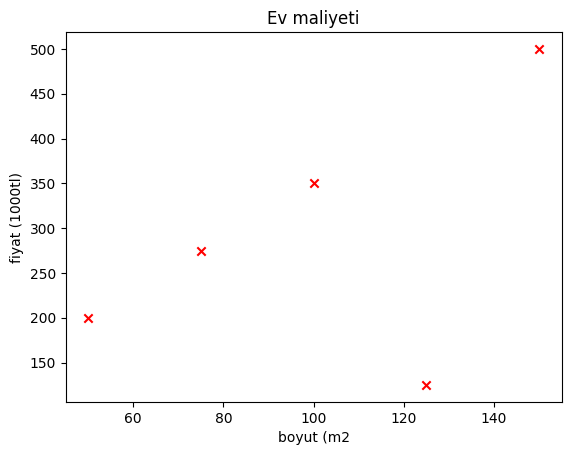

In [43]:
# grafiğe dökelim
plt.scatter(x_train, y_train, marker="x",c="r")
plt.title("Ev maliyeti")
plt.ylabel("fiyat (1000tl)")
plt.xlabel("boyut (m2")

# maliyeti (cost) hesaplayalım 
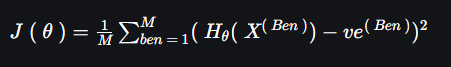

In [15]:
def compute_cost(x, y, w, b):
    m = x.shape[0]

    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2 
    total_cost = cost / (2 * m)
    return total_cost

In [20]:
w = 150
b = 90
print("Maliyet: {}".format(compute_cost(x_train, y_train, w, b)))

Maliyet: 3925.0


# Gradient descent algoritmasını uygulamak
Maliyeti daha da azaltmak için w ve b değerlinin uygun seçilmesi gerekir. Bunları uygun seçebilmek için de gradient descent algoritması kullanılabilir. 

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [21]:
# türev alma işlemini yapalım
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = (w * x[i] + b) - y[i]
        dj_dw += f_wb * x[i]
        dj_db += f_wb 
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db     
    

bu bir kere w ve b değerlerini güncelliyor. Fakat en uygun değerleri bulmak için bunu da bir döngü içerisinde kullanmamız gerekir. 

# DOĞRUSAL REGRESYON İÇİN BİRKAÇ ÖRNEK

Ev Fiyatları Tahmini 
Gerçek Model:
𝑦 = 3000𝑥+50000 (Burada w = 3000, b = 50000)


In [26]:
import numpy as np 
import matplotlib.pyplot as plt 

# veriyi tanıma

In [50]:
x_train = np.array([50, 75, 100, 125, 150])
y_train = np.array([200000, 275000, 350000, 425000, 500000])

m = x_train.shape
print("örnek ve feature sayısı: {}".format(m))

örnek ve feature sayısı: (5,)


Text(0, 0.5, 'fiyat (bin tl)')

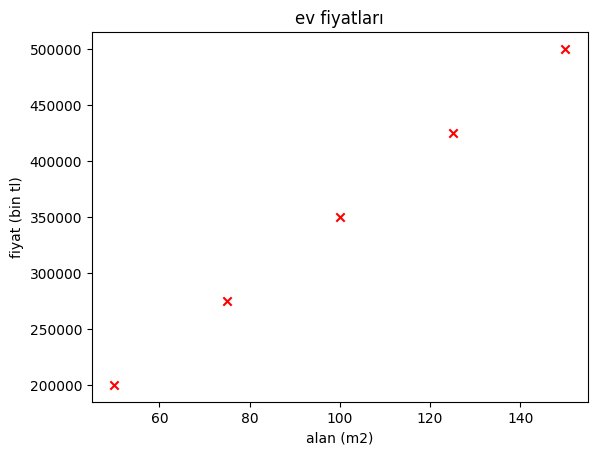

In [56]:
plt.scatter(x_train, y_train, marker="x", c="r")
plt.title("ev fiyatları")
plt.xlabel("alan (m2)")
plt.ylabel("fiyat (bin tl)")


In [58]:
def model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w * x[i] + b    
    return f_wb 

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2

    total_cost = cost / m

    return total_cost

In [62]:
tahminlerimiz = model_output(x_train, 3000, 50000)
print(tahminlerimiz)
compute_cost(x_train, y_train, 3000, 50000)

[200000. 275000. 350000. 425000. 500000.]


np.float64(0.0)

# değerlerimizi grafiğe dökelim

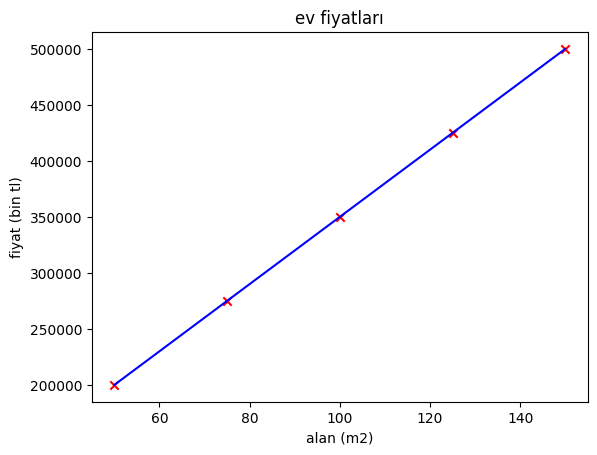

In [64]:
plt.scatter(x_train, y_train, marker="x", c="r")
plt.title("ev fiyatları")
plt.xlabel("alan (m2)")
plt.ylabel("fiyat (bin tl)")
plt.plot(x_train, tahminlerimiz, c="b", label="tahminimiz")